## IS 362 Final Project

### Analyzing Records of UFO Sightings

In [240]:
import sqlite3
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

First, let us import our UFO dataset, which is a .csv file:

In [242]:
df = pd.read_csv('IS362/Data/ufo-sightings-transformed.csv', index_col=0)
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


Now we will rewrite the dataframe object with the columns we are interested in analyzing:

In [243]:
df = df[['Year', 'Month', 'Country_Code', 'Region', 'UFO_shape', 'length_of_encounter_seconds']]
df.head()

,Year,Month,Country_Code,Region,UFO_shape,length_of_encounter_seconds
0,1949,10,USA,Texas,Cylinder,2700.0
1,1949,10,USA,Texas,Light,7200.0
2,1955,10,GBR,England,Circle,20.0
3,1956,10,USA,Texas,Circle,20.0
4,1960,10,USA,Hawaii,Light,900.0


And we will limit our results to sightings in the USA:

In [244]:
df.drop(df[df.Country_Code != 'USA'].index, inplace=True)

#We drop the 'Country_Code' column here since it is no longer needed.
df.drop(['Country_Code'], axis=1, inplace=True)

df.head()

,Year,Month,Region,UFO_shape,length_of_encounter_seconds
0,1949,10,Texas,Cylinder,2700.0
1,1949,10,Texas,Light,7200.0
3,1956,10,Texas,Circle,20.0
4,1960,10,Hawaii,Light,900.0
5,1961,10,Tennessee,Sphere,300.0


Now we can begin analyzing the data. We will start by looking at the number of reported sightings by year, starting from the year 1990:

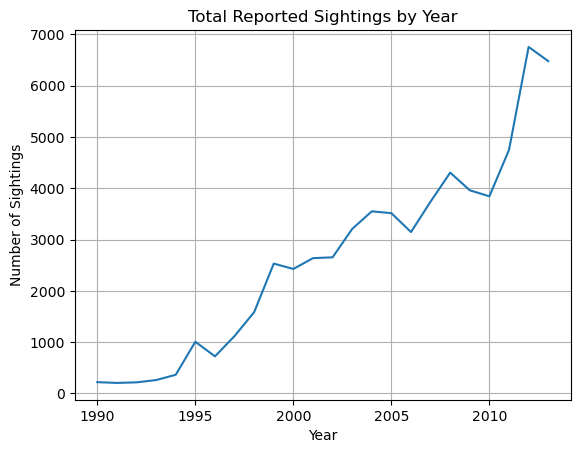

In [245]:
yearly_frequency = pd.DataFrame(df['Year'].value_counts()) 
yearly_frequency.reset_index(level=0, inplace=True)
yearly_frequency.rename(columns={'index': 'Year', 'Year': 'Frequency'}, inplace=True)
yearly_frequency = yearly_frequency.sort_values(['Year'])
#We will also remove the year 2014 from the analysis because there are only records for part of the year.
yearly_frequency.drop(yearly_frequency[(yearly_frequency.Year < 1990) | (yearly_frequency.Year == 2014)].index, inplace=True)
yearly_frequency.set_index('Year', inplace=True)

#Plot a line chart:
yearly_frequency['Frequency'].plot(kind='line', title='Total Reported Sightings by Year')
plt.grid()
plt.ylabel('Number of Sightings')
plt.show()

We can see from the above line chart that the number of reported sightings increases consistently and quite dramatically from 1990 and into the early 2010's. This would seem to coincide with an increase in digital recordkeeping and internet use. 

Let us look at sighting frequency by month:

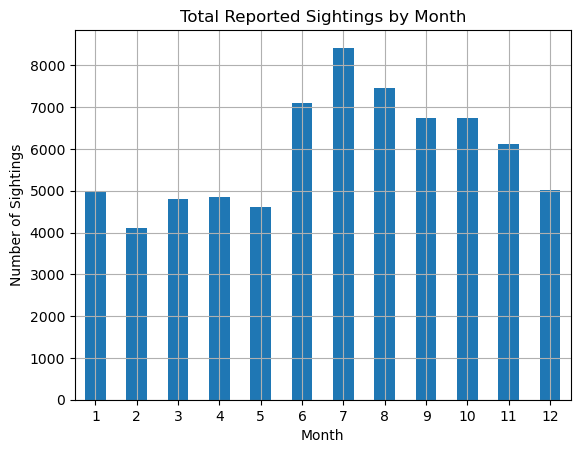

In [248]:
monthly_frequency = pd.DataFrame(df['Month'].value_counts()) 
monthly_frequency.reset_index(level=0, inplace=True)
monthly_frequency.rename(columns={'index': 'Month', 'Month': 'Frequency'}, inplace=True)
monthly_frequency = monthly_frequency.sort_values(['Month'])
monthly_frequency.set_index('Month', inplace=True)

#Plot a bar chart:
monthly_frequency['Frequency'].plot(kind='bar', title='Total Reported Sightings by Month')
plt.grid()
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.show()

On average, the greatest number of sightings occur in July and decline steadily into December. If we are looking for a rational explanation, it could be that more people are outdoors in the summertime, or perhaps there is an environmental phenomenon related to the season. Once again, this visual alone does not tell us enough to draw any firm conclusions. 

What if we look at the most common shape?

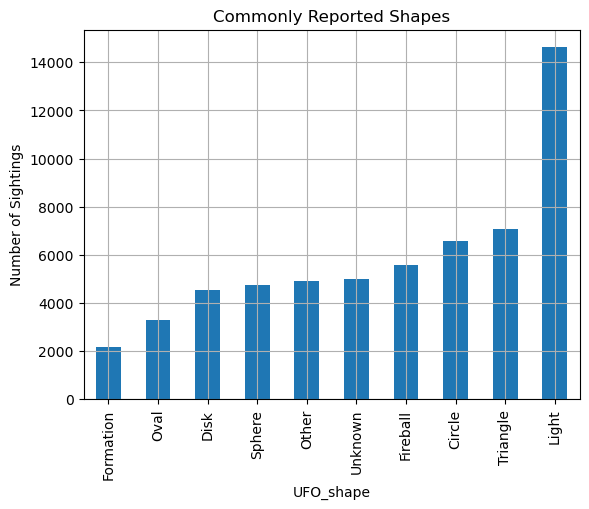

In [249]:
shape_frequency = pd.DataFrame(df['UFO_shape'].value_counts()) 
shape_frequency.reset_index(level=0, inplace=True)
shape_frequency.rename(columns={'index': 'UFO_shape', 'UFO_shape': 'Frequency'}, inplace=True)
shape_frequency = shape_frequency.sort_values(['Frequency'])
shape_frequency.set_index('UFO_shape', inplace=True)

#Plot a bar chart:
shape_frequency['Frequency'].tail(10).plot(kind='bar', title='Commonly Reported Shapes')
plt.grid()
plt.ylabel('Number of Sightings')
plt.show()

By far, the most commonly reported shape is 'light'. If we include the 'Other' and 'Unknown' categories, formless shapes make up more than half the total observations presented here.

Now we will see if we can discover any patterns by comparing the data.

In [250]:
#Limit dataset to top 10 reported shapes:
top_shapes = shape_frequency.tail(10).index.tolist()

for index, row in df.iterrows():
        if row['UFO_shape'] not in top_shapes:
            df.drop([index], inplace=True)

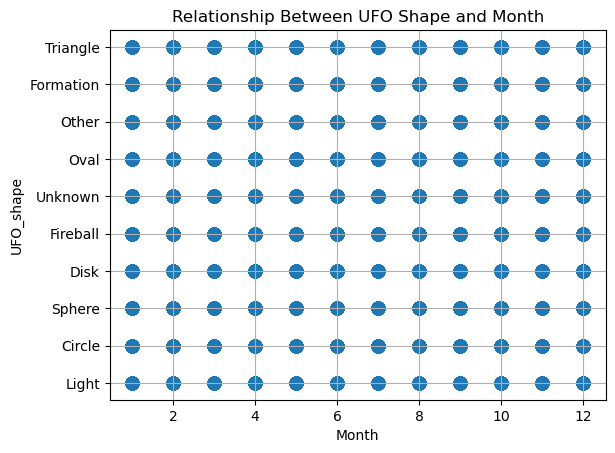

In [227]:
#Plot a scatter plot:
df.plot(kind='scatter', x='Month', y='UFO_shape', s=80, alpha=0.2, title='Relationship Between UFO Shape and Month');
plt.grid()
plt.show()

We can see absolutely no relationship between month and UFO shape. We can conclude that there is a random chance of seeing a particular shape at a particular time of year.

What about the top regions for sightings:

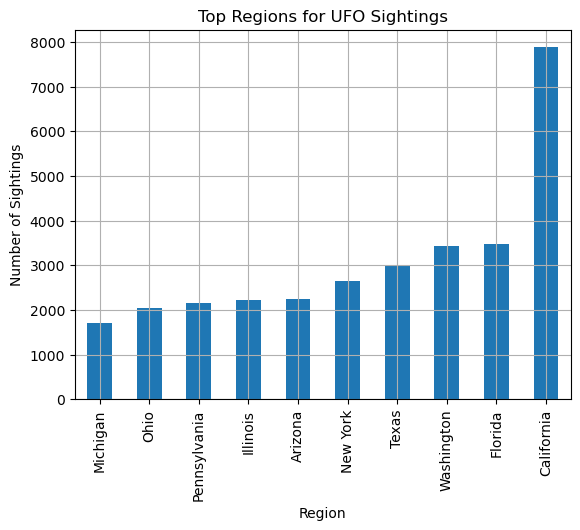

In [253]:
region_frequency = pd.DataFrame(df['Region'].value_counts()) 
region_frequency.reset_index(level=0, inplace=True)
region_frequency.rename(columns={'index': 'Region', 'Region': 'Frequency'}, inplace=True)
region_frequency = region_frequency.sort_values(['Frequency'])
region_frequency.set_index('Region', inplace=True)

#Plot a bar chart:
region_frequency['Frequency'].tail(10).plot(kind='bar', title='Top Regions for UFO Sightings')
plt.grid()
plt.ylabel('Number of Sightings')
plt.show()

As expected, many of the most populated states also report the most sightings. Washington and Arizona are interesting, however, because they have the lowest populations of all the states present, but rank quite high in terms of sightings - especially Washington. 

Let's look at these top regions in more detail.

In [254]:
#Limit dataset to top 10 reported regions:
top_regions = region_frequency.tail(10).index.tolist()

for index, row in df.iterrows():
        if row['Region'] not in top_regions:
            df.drop([index], inplace=True)

Which month saw the most activity per region?

In [256]:
df.groupby(['Region'])['Month'].agg(pd.Series.mode)

Region
Arizona          3
California       7
Florida         12
Illinois         7
Michigan         7
New York         7
Ohio             7
Pennsylvania     7
Texas           10
Washington       7
Name: Month, dtype: int64

It is interesting to note that the southern states - Florida, Texas, and Arizona - are outliers here. This seems to support my theory that sightings are more frequent when the weather is more pleasant to be outside, not necessarily because there are more UFOs during these months. 

Which shapes are most commonly reported by region?

In [257]:
df.groupby(['Region'])['UFO_shape'].agg(pd.Series.mode)

Region
Arizona         Light
California      Light
Florida         Light
Illinois        Light
Michigan        Light
New York        Light
Ohio            Light
Pennsylvania    Light
Texas           Light
Washington      Light
Name: UFO_shape, dtype: object

Unsurprisingly, given its predominance in the chart above, 'light' was the most commonly reported shape on average for each of the top 10 states.

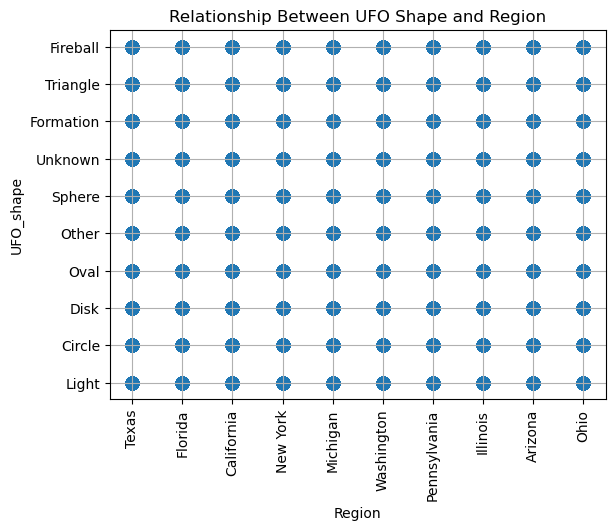

In [258]:
#Plot a scatter plot:
df.plot(kind='scatter', x='Region', y='UFO_shape', s=80, alpha=0.2, title='Relationship Between UFO Shape and Region');
plt.grid()
plt.xticks(rotation=90)
plt.show()

Once again, we find no apparent relationship between variables, in this case UFO shape and region. 

We have not yet looked at encounter duration. What is the maximum duration for each of the top reported shapes?

In [259]:
df.groupby(['UFO_shape'])['length_of_encounter_seconds'].max()

UFO_shape
Circle         432000.0
Disk           259200.0
Fireball      6120000.0
Formation      604800.0
Light        52623200.0
Other         6312000.0
Oval          6312000.0
Sphere         604800.0
Triangle       345600.0
Unknown      10526400.0
Name: length_of_encounter_seconds, dtype: float64

At this point a major flaw in the dataset is revealed: the accuracy of data sourced from individual accounts of events. There is little consistency and standard in the measurement of time. Some people measured multiple recurring sightings over the course of months or years as one record. Obviously, we cannot compare this to a single sighting in terms of duration. Thus we are limited in what we can conclude from this. We have found no discernable pattern, other than the increasing frequency of sightings, which generally correlates to population increases as well as the adoption of the internet. How many of these recorded sightings are legitimate cannot be verified. Indeed, it seems that UFOs remain something of a mystery.